# Water Dataset Demo

In [1]:
# import everything we need
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from WaterDataset import WaterDataset
from Baseline import Baseline
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

/home/ophirsim/miniconda3/envs/ClimaXtreme/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## There are 4 big decisions we need to make:

1. How far into the future do we want to predict? (timestep)
2. How much history do we want to feed our model (history)
3. Do we want our model to learn how to predict ALL timesteps up until the timestep we give it or JUST the timestep we give it? (iterative)
4. What transformations do we want to apply to our data and labels, and on the dtype and device of the tensors that are returned (transform, target_transform, dtype, device)

torch.Size([3, 480, 716])
torch.Size([480, 716])
torch.Size([1])


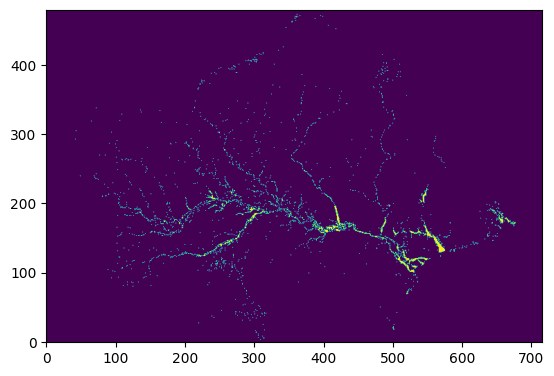

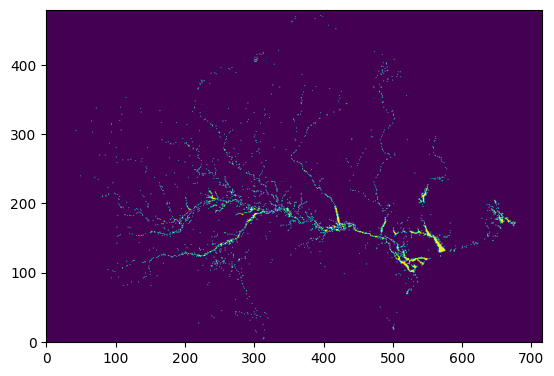

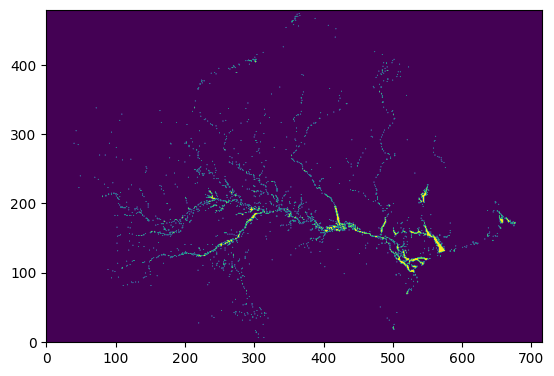

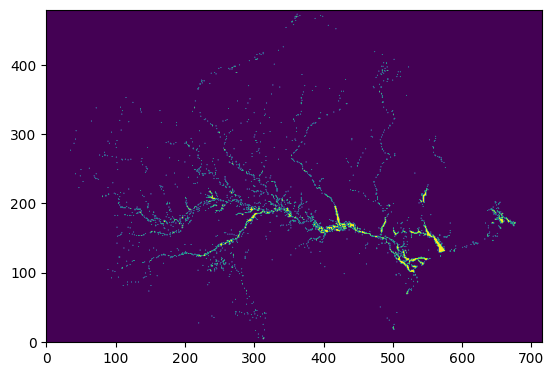

In [2]:
timestep = 6
history = 3
iterative = True
transform, target_transform = None, None
dtype = torch.float
device = 'cuda'

train_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/train', timestep=timestep, history=history, iterative=iterative,
                        transform=transform, target_transform=target_transform, dtype=dtype, device=device)
val_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/val', timestep=timestep, history=history, iterative=iterative,
                        transform=transform, target_transform=target_transform, dtype=dtype, device=device)
test_set = WaterDataset('/localhome/ophirsim/Imazon_Water_Dataset/test', timestep=timestep, history=history, iterative=iterative,
                        transform=transform, target_transform=target_transform, dtype=dtype, device=device)

data, label, gap = train_set[0]
print(data.shape)
print(label.shape)
print(gap.shape)

plt.figure()
plt.imshow(data[0, :, :].cpu(), origin='lower')
plt.figure()
plt.imshow(data[1, :, :].cpu(), origin='lower')
plt.figure()
plt.imshow(data[2, :, :].cpu(), origin='lower')
plt.figure()
plt.imshow(label[:, :].cpu(), origin='lower')